In [1]:
from typing_extensions import TypedDict
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [ ]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")

def GroqBot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}



In [5]:
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

graph.add_node("GroqBot",GroqBot)

graph.add_edge(START,"GroqBot")
graph.add_edge("GroqBot",END)

graph_commp= graph.compile()


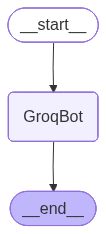

In [6]:
from IPython.display import Image, display
display(Image(graph_commp.get_graph().draw_mermaid_png()))

In [7]:
graph_commp.invoke({'messages':"Hi I am Phanindra"})

BadRequestError: Error code: 400 - {'error': {'message': 'The model `qwen-qwq-32b` has been decommissioned and is no longer supported. Please refer to https://console.groq.com/docs/deprecations for a recommendation on which model to use instead.', 'type': 'invalid_request_error', 'code': 'model_decommissioned'}}